<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_classify_face_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical

In [4]:
folder = '/content/drive/MyDrive/Data_CNN/Train/face'
name = ['Binh', 'Chi', 'Chuong','Dong','Huy', 'Phi', 'Phong', 'Thang','Thanh', 'Tri', 'Truong', 'Tu', 'Tuan', 'Tung', 'Loc', 'Vinh' ]
photos, lables = list(), list()
for i in range (15):
  filename = folder +'/'+ name[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(40,40))
    photo = img_to_array(photo)
    photos.append(photo)
    lables.append(i)
photos_train = asarray(photos)
lables_train = asarray(lables)

In [6]:
print(photos_train.shape)
print(lables_train.shape)

(747, 40, 40, 3)
(747,)


In [7]:
from keras.utils import to_categorical
y_train = to_categorical(lables_train)
print(y_train.shape)

(747, 15)


In [8]:
X_train = photos_train.astype('float32')/255

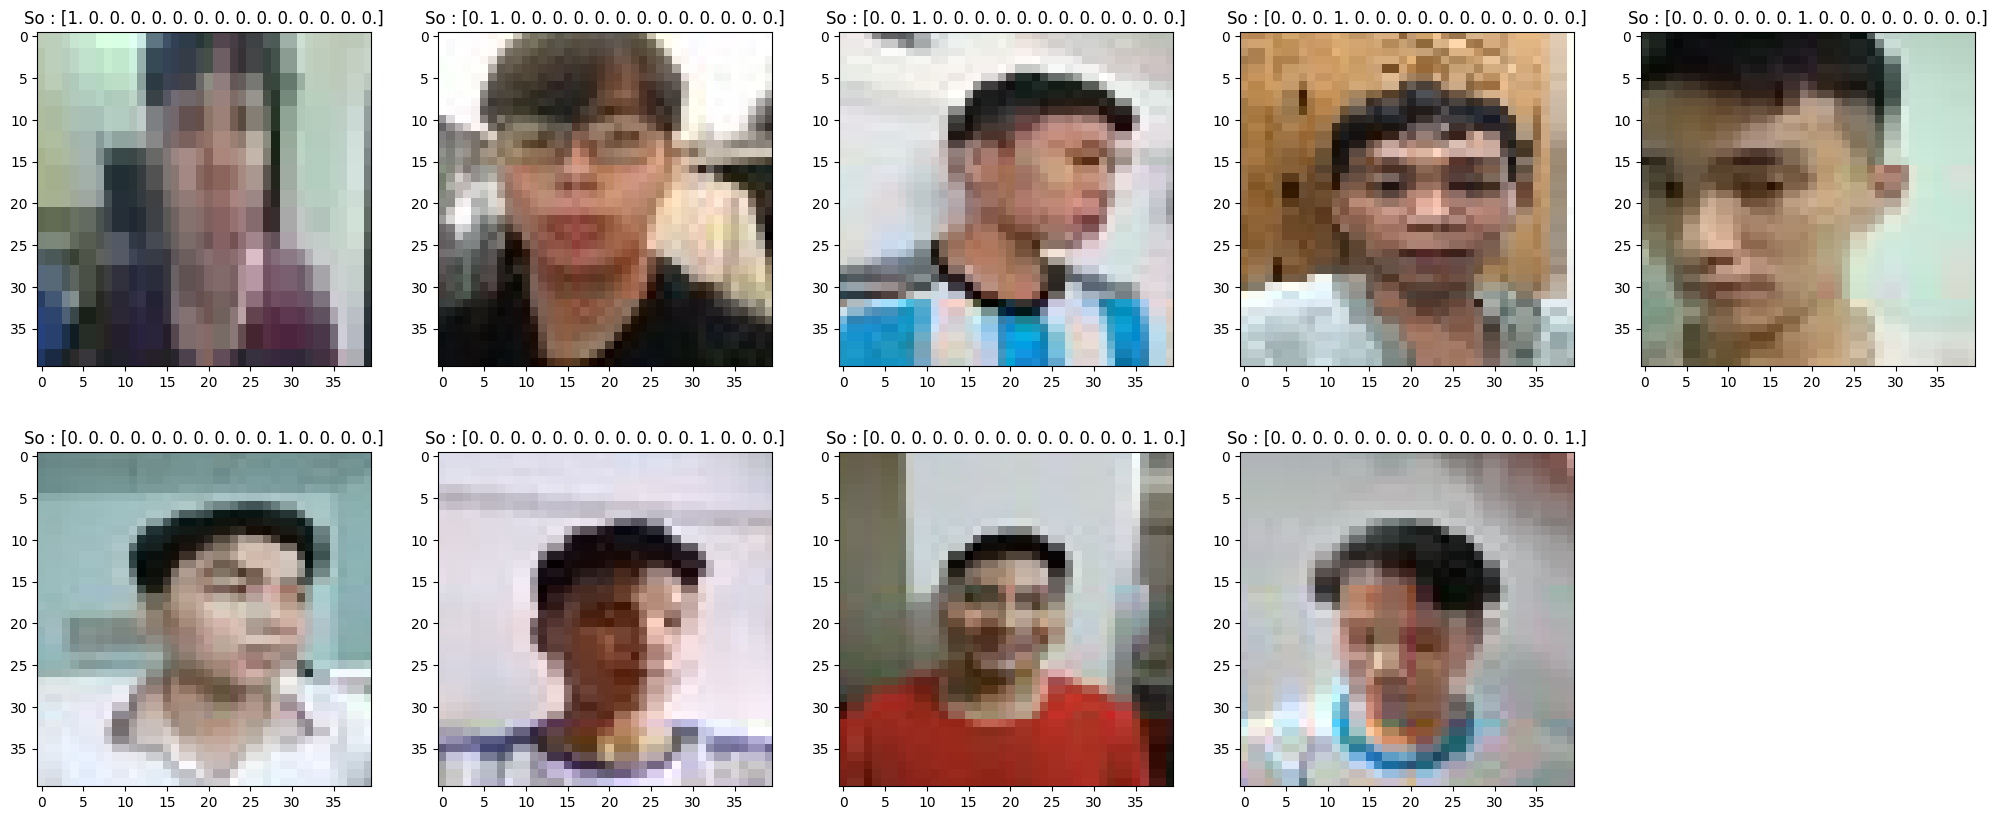

In [11]:
plt.figure(figsize = [25,10])

plt.subplot(251)
plt.imshow(X_train[1])
plt.title('So : {}'.format(y_train[1]))

plt.subplot(252)
plt.imshow(X_train[60])
plt.title('So : {}'.format(y_train[60]))

plt.subplot(253)
plt.imshow(X_train[100])
plt.title('So : {}'.format(y_train[100]))

plt.subplot(254)
plt.imshow(X_train[160])
plt.title('So : {}'.format(y_train[160]))

plt.subplot(255)
plt.imshow(X_train[300])
plt.title('So : {}'.format(y_train[300]))

plt.subplot(256)
plt.imshow(X_train[500])
plt.title('So : {}'.format(y_train[500]))

plt.subplot(257)
plt.imshow(X_train[580])
plt.title('So : {}'.format(y_train[580]))

plt.subplot(258)
plt.imshow(X_train[650])
plt.title('So : {}'.format(y_train[650]))

plt.subplot(259)
plt.imshow(X_train[700])
plt.title('So : {}'.format(y_train[700]))

plt.show()

In [12]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy

In [18]:
batch_size = 64
epochs = 10
classes = 15

In [17]:

model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (40,40,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                  

In [19]:
train = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/10
12/12 [==============================] - 6s 407ms/step - loss: 2.1443 - accuracy: 0.4190
Epoch 2/10
12/12 [==============================] - 3s 258ms/step - loss: 0.5831 - accuracy: 0.8260
Epoch 3/10
12/12 [==============================] - 3s 262ms/step - loss: 0.1491 - accuracy: 0.9639
Epoch 4/10
12/12 [==============================] - 3s 280ms/step - loss: 0.0846 - accuracy: 0.9813
Epoch 5/10
12/12 [==============================] - 5s 419ms/step - loss: 0.0505 - accuracy: 0.9839
Epoch 6/10
12/12 [==============================] - 3s 263ms/step - loss: 0.0364 - accuracy: 0.9866
Epoch 7/10
12/12 [==============================] - 3s 261ms/step - loss: 0.0121 - accuracy: 0.9973
Epoch 8/10
12/12 [==============================] - 3s 261ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 5s 443ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 3s 256ms/step - loss: 0.0011 - accuracy: 1.0000

In [24]:

folder = '/content/drive/MyDrive/Data_CNN/Test/face'
name = ['Binh', 'Chi', 'Chuong','Dong','Huy', 'Phi', 'Phong', 'Thang','Thanh', 'Tri', 'Truong', 'Tu', 'Tuan', 'Tung', 'Loc', 'Vinh' ]
X_test, y_test = list(), list()
for i in range (15):
  filename = folder +'/'+ name[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(40,40))
    photo = img_to_array(photo)
    X_test.append(photo)
    y_test.append(i)
X_test = asarray(X_test)
y_test = asarray(y_test)

In [25]:
print(X_test.shape)
print(y_test.shape)

(153, 40, 40, 3)
(153,)


In [26]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
X_test = X_test.astype('float32')/255

5/5 [==============================] - 1s 55ms/step - loss: 0.1639 - accuracy: 0.9739
Test loss 0.16389942169189453
Test accuracy 0.9738562107086182


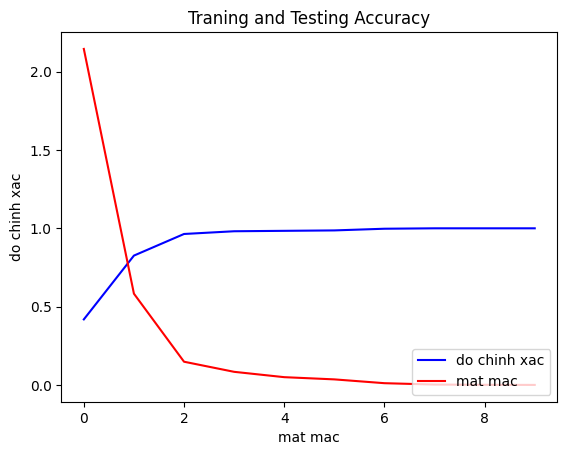

In [27]:
eval = model.evaluate(X_test, y_test)

print('Test loss',eval[0])
print('Test accuracy',eval[1])

accuracy=train.history['accuracy']
loss=train.history['loss']

epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'b')
plt.plot(epochs,loss,'r')
plt.title('Traning and Testing Accuracy')
plt.ylabel('do chinh xac')
plt.xlabel('mat mac')
plt.legend(['do chinh xac','mat mac'], loc = 'lower right')

1/1 [==============================] - 0s 23ms/step


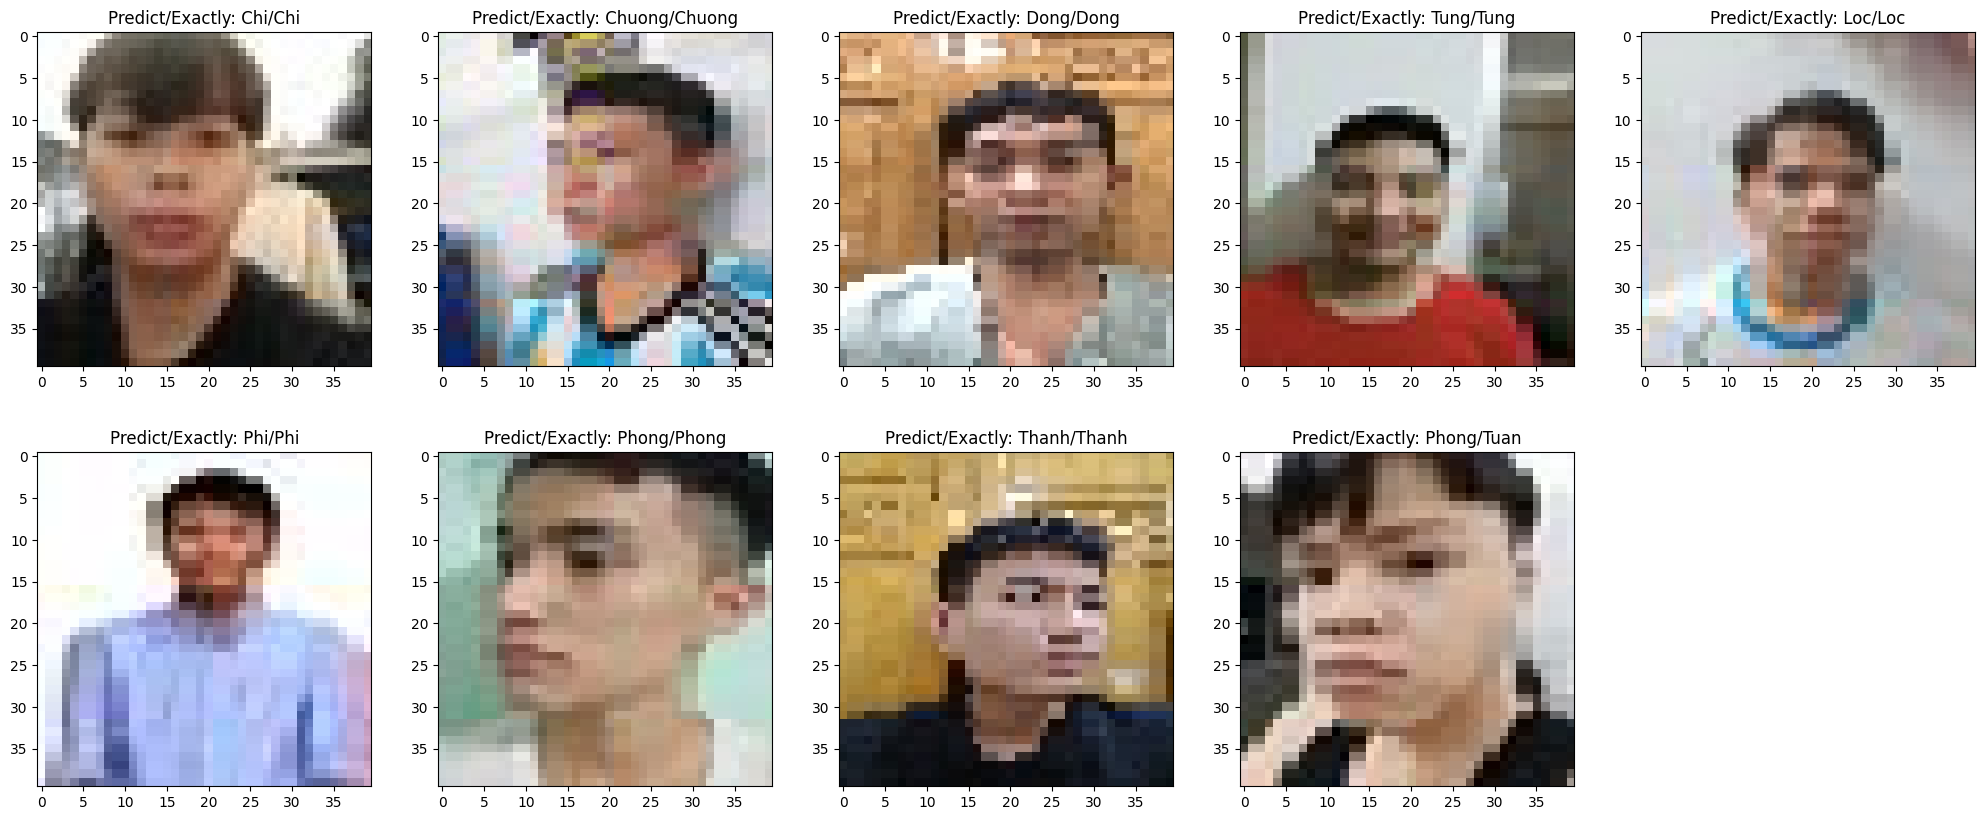

In [35]:

plt.figure(figsize = [25,10])

plt.subplot(251)
plt.imshow(X_test[10])
pred = model.predict(X_test[10].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[10].argmax()] ))

plt.subplot(252)
plt.imshow(X_test[20])
pred = model.predict(X_test[20].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[20].argmax()] ))

plt.subplot(253)
plt.imshow(X_test[30])
pred = model.predict(X_test[30].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[30].argmax()] ))

plt.subplot(254)
plt.imshow(X_test[140])
pred = model.predict(X_test[140].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[140].argmax()] ))

plt.subplot(255)
plt.imshow(X_test[149])
pred = model.predict(X_test[149].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[149].argmax()] ))

plt.subplot(256)
plt.imshow(X_test[60])
pred = model.predict(X_test[60].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[60].argmax()] ))

plt.subplot(257)
plt.imshow(X_test[70])
pred = model.predict(X_test[70].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[70].argmax()] ))

plt.subplot(258)
plt.imshow(X_test[90])
pred = model.predict(X_test[90].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[90].argmax()] ))

plt.subplot(259)
plt.imshow(X_test[130])
pred = model.predict(X_test[130].reshape((1,40,40,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[y_test[130].argmax()] ))


plt.show()